<a href="https://colab.research.google.com/github/Mariobahaa/Money-Ball/blob/master/Money_Ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SCIENCE PROJECT 2
### By Mario Bahaa Zarif Sec 4 SC

# Part I: Data Wrangling

In this stage, we create a new SQLite connection to fetch the needed data into a pandas dataframe.
We'll save our data in two different pandas dataframes.
data: this will include all the data we want for future steps.
totals: just for demonstration, to display the total payroll and total winning percentage.


Our main targets are two tables: Salaries and Teams.
first, we select teamID, sum of salary column, yearID (in data dataframe only) and then group them by TeamID, yearID (in data dataframe only) so that we can get the total payroll for each team. 
Then, we join the result table which we call GSal with Teams table using inner join which helps with missing data.
At last, we select the needed columns and create the winning percentage column in the resultant dataframe. (and order by teamID in case of totals dataframe to get values for each team, not based on any other attribute)

In [ ]:
import numpy as np 
import sqlite3 
import pandas as pd


In [ ]:
Path = "C:/Users/lenovo/Downloads/DS Project 2/"

In [ ]:
con = sqlite3.connect(Path+"lahman2014.sqlite")

#this dataframe includes everything that will be needed in future stages 
data = pd.read_sql_query("WITH GSal as (SELECT teamID, sum(salary) as yearlySalary, yearID FROM Salaries GROUP BY teamID, yearID) SELECT GSal.teamID,  GSal.yearID, GSal.yearlySalary as totalPayroll, ((Teams.W*1.0)/(Teams.G*1.0))*100.0 as WinningPercentage FROM GSal, Teams WHERE GSal.teamID = Teams.teamID AND GSal.yearID = Teams.yearID;" ,con)                 

#this dataframe includes only the total payroll and the winning percentage
totals = pd.read_sql_query("WITH GSal as (SELECT teamID, sum(salary) as totalSalaries FROM Salaries GROUP BY teamID) SELECT GSal.teamID,  GSal.totalSalaries  as totalPayroll, ((Teams.W*1.0)/(Teams.G*1.0))*100.0 as WinningPercentage FROM GSal, Teams WHERE GSal.teamID = Teams.teamID GROUP BY Teams.teamID;" ,con)                 


con.close()

totals

,teamID,totalPayroll,WinningPercentage
0,ANA,4.680920e+08,51.851852
1,ARI,1.209975e+09,40.123457
2,ATL,1.882947e+09,52.147239
3,BAL,1.630200e+09,35.064935
4,BOS,2.432701e+09,57.246377
5,CAL,2.719789e+08,46.296296
6,CHA,1.699865e+09,60.583942
7,CHN,1.859833e+09,78.787879
8,CIN,1.434775e+09,57.462687
9,CLE,1.405016e+09,39.130435


# Part II: Exploratory Data Analysis

### Payroll Distribution

First, we filter the data to keep only data from 1990 to 2014

In [ ]:
filtered_data = data[data.yearID >=1990 ]
filtered_data = filtered_data[filtered_data.yearID <=2014]
filtered_data

,teamID,yearID,totalPayroll,WinningPercentage
130,ATL,1990,14555501.0,40.123457
131,BAL,1990,9680084.0,47.204969
132,BOS,1990,20558333.0,54.320988
133,CAL,1990,21720000.0,49.382716
134,CHA,1990,9491500.0,58.024691
135,CHN,1990,13624000.0,47.530864
136,CIN,1990,14370000.0,56.172840
137,CLE,1990,14487000.0,47.530864
138,DET,1990,17593238.0,48.765432
139,HOU,1990,18330000.0,46.296296


Then, we plot the total payroll for each team throughout the years from 1990 to 2014

In [ ]:
# import matplotlib.pyplot as plt

# teamIDs = set([])
# for i in filtered_data['teamID']:
#     teamIDs.add(i)

# plt.xlabel("years",fontsize= 14)
# plt.ylabel("total payroll",fontsize= 14)
# for tid in teamIDs:
#     temp = filtered_data[filtered_data.teamID == tid]
#     if len(temp['totalPayroll'].values[0]) == 25:
#         plt.plot(range(1990,2015),temp['totalPayroll'].values)

# plt.show()
    

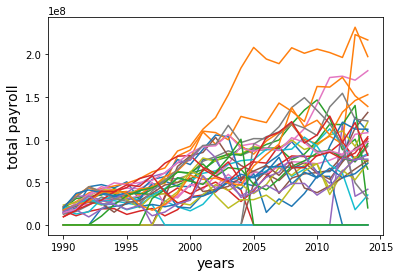

In [ ]:
import matplotlib.pyplot as plt

teamIDs = set([])
for i in filtered_data['teamID']:
    teamIDs.add(i)

plt.xlabel("years",fontsize= 14)
plt.ylabel("total payroll",fontsize= 14)
for tid in teamIDs:
    temp = filtered_data[filtered_data.teamID == tid]
    yaxis = []
    for y in range (1990,2015):
        t = temp[temp.yearID == y]
        try:
            yaxis.append(t['totalPayroll'].values[0])
            
        except:
            yaxis.append(0)
    #print(len(yaxis))        
    plt.plot(range(1990,2015),yaxis)

plt.show()
    

As we can see from this plot, 
the graphs spread widely on the x-axis range: 1990-2015
but, on the y-axis all graphs are clustered in a small area at some point while the range is: 0 - approx 2.4 le8.
The graph tends to grow in the direction of x-axis, which indicates the increase in total payroll for each teams as years pass.
As for central tendency it varies from a team to another but is mostly low as we can see that the mean will be in the right half of the graph which holds less values.

### Correlation between payroll and winning percentage

First, we divide the data according to 5 time periods

In [ ]:
time1 = filtered_data[filtered_data.yearID>=1990] 
time1 = filtered_data[filtered_data.yearID<=1994] 

time2 = filtered_data[filtered_data.yearID>=1995] 
time2 = filtered_data[filtered_data.yearID<=1999]

time3 = filtered_data[filtered_data.yearID>=2000] 
time3 = filtered_data[filtered_data.yearID<=2004]

time4 = filtered_data[filtered_data.yearID>=2005] 
time4 = filtered_data[filtered_data.yearID<=2009]

time5 = filtered_data[filtered_data.yearID>=2010] 
time5 = filtered_data[filtered_data.yearID<=2014]



We calaculate average Payroll for each of the 5 time periods.
we notice that the average payroll values tend to increase as years pass.

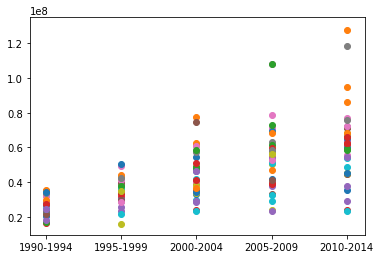

In [ ]:
for i in teamIDs:
    temp = time1[time1.teamID == i]
    #tppoints.append(temp['totalPayroll'].mean())
    plt.scatter('1990-1994',temp['totalPayroll'].mean())

for i in teamIDs :
    
    temp = time2[time2.teamID == i]
    plt.scatter('1995-1999',temp['totalPayroll'].mean())

for i in teamIDs :
    
    temp = time3[time3.teamID == i]
    plt.scatter('2000-2004',temp['totalPayroll'].mean())

for i in teamIDs :
                    
    temp = time4[time4.teamID == i]
    plt.scatter('2005-2009',temp['totalPayroll'].mean())

for i in teamIDs :
                    
    temp = time5[time5.teamID == i]
    plt.scatter('2010-2014',temp['totalPayroll'].mean())
    

plt.show()


We calaculate average winning percentage for each of the 5 time periods. we notice that winning percentage tends to cluster at the center.

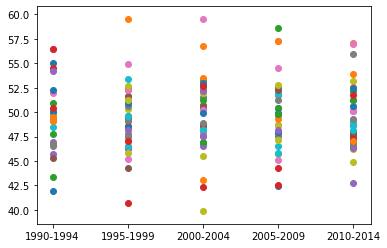

In [ ]:
for i in teamIDs:
    temp = time1[time1.teamID == i]
    #tppoints.append(temp['totalPayroll'].mean())
    plt.scatter('1990-1994',temp['WinningPercentage'].mean())

for i in teamIDs :
    
    temp = time2[time2.teamID == i]
    plt.scatter('1995-1999',temp['WinningPercentage'].mean())

for i in teamIDs :
    
    temp = time3[time3.teamID == i]
    plt.scatter('2000-2004',temp['WinningPercentage'].mean())

for i in teamIDs :
                    
    temp = time4[time4.teamID == i]
    plt.scatter('2005-2009',temp['WinningPercentage'].mean())

for i in teamIDs :
                    
    temp = time5[time5.teamID == i]
    plt.scatter('2010-2014',temp['WinningPercentage'].mean())
    

plt.show()


For illustration, we combine both graphs to get clear results, avergae payroll on x-axis and average winning precentage on y-axis

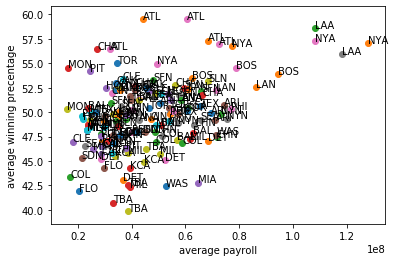

In [ ]:
x = []
y = []
names = []

for i in teamIDs:
    temp = time1[time1.teamID == i]
    #tppoints.append(temp['totalPayroll'].mean())
    plt.scatter(temp['totalPayroll'].mean(),temp['WinningPercentage'].mean())
    x.append(temp['totalPayroll'].mean())
    y.append(temp['WinningPercentage'].mean())
    names.append(i)

for i in teamIDs :
    
    temp = time2[time2.teamID == i]
    plt.scatter(temp['totalPayroll'].mean(),temp['WinningPercentage'].mean())
    x.append(temp['totalPayroll'].mean())
    y.append(temp['WinningPercentage'].mean())
    names.append(i)

for i in teamIDs :
    
    temp = time3[time3.teamID == i]
    plt.scatter(temp['totalPayroll'].mean(),temp['WinningPercentage'].mean())
    x.append(temp['totalPayroll'].mean())
    y.append(temp['WinningPercentage'].mean())
    names.append(i)

for i in teamIDs :
                    
    temp = time4[time4.teamID == i]
    plt.scatter(temp['totalPayroll'].mean(),temp['WinningPercentage'].mean())
    x.append(temp['totalPayroll'].mean())
    y.append(temp['WinningPercentage'].mean())
    names.append(i)

for i in teamIDs :
                    
    temp = time5[time5.teamID == i]
    plt.scatter(temp['totalPayroll'].mean(),temp['WinningPercentage'].mean())
    x.append(temp['totalPayroll'].mean())
    y.append(temp['WinningPercentage'].mean())
    names.append(i)
    
plt.xlabel("average payroll",fontsize =10)
plt.ylabel("average winning precentage",fontsize =10)

for name, X, Y in zip(names, x,y):
    plt.annotate(str(name), (X,Y))

plt.show()


As we can see from the previous graph, the data tends to cluster at a certain area with no clear indication. although, a very small some of points on the graph indicate some tendency of the winning rate to increase as payroll increases, it is not enough to prove that there is a strong positive correlation between average payroll and average winning precentage.

#### Teams that were good at payment:

There are some, such as: ATL, NYA, LAA, BOS (,OAK just beneath)

#### From the above data, it looks like Okland As were not with those with the highest winning rates nor were they paying a lot, they didn't pay a lot but their winning rate was high, not always from the highest, but high relatively.

# Part III: Data Transformations

### Standarizing across years

First, we find average payroll and payroll standard deviation of each year.

In [ ]:
avg_payroll = []
payroll_sdev = []
for i in range(1985,2015):
    temp = data[data.yearID == i]
    avg_payroll.append(temp['totalPayroll'].mean())
    payroll_sdev.append(temp['totalPayroll'].std())

Apply the equation to get a new column, standaralized payroll

In [ ]:
std_pay = []
for i in range(0,len(data)):
    spay = (data['totalPayroll'][i]-avg_payroll[data['yearID'][i]%1985])/payroll_sdev[data['yearID'][i]%1985]
    std_pay.append(spay)

        
data['std_payroll'] = std_pay
data

,teamID,yearID,totalPayroll,WinningPercentage,std_payroll
0,ATL,1985,14807000.0,40.740741,1.914905
1,BAL,1985,11560712.0,51.552795,0.601068
2,BOS,1985,10897560.0,49.693252,0.332678
3,CAL,1985,14427894.0,55.555556,1.761474
4,CHA,1985,9846178.0,52.147239,-0.092838
5,CHN,1985,12702917.0,47.530864,1.063341
6,CIN,1985,8359917.0,54.938272,-0.694357
7,CLE,1985,6551666.0,37.037037,-1.426192
8,DET,1985,10348143.0,52.173913,0.110318
9,HOU,1985,9993051.0,51.234568,-0.033395


Plot std payroll against winning percentage

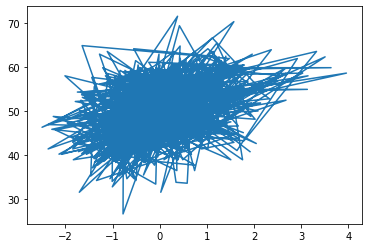

In [ ]:
plt.plot(data['std_payroll'],data['WinningPercentage'])
plt.show()

Plot std payroll against winning percentage for each year

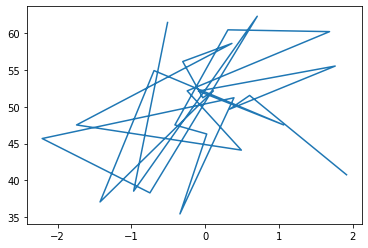

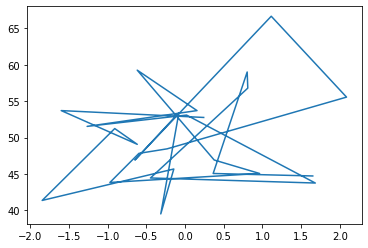

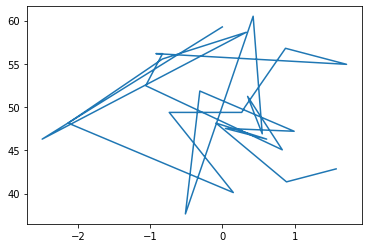

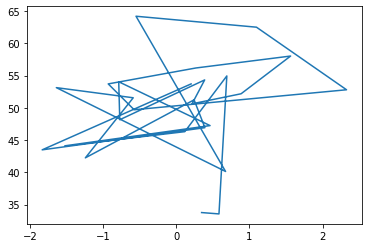

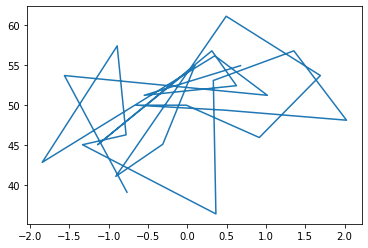

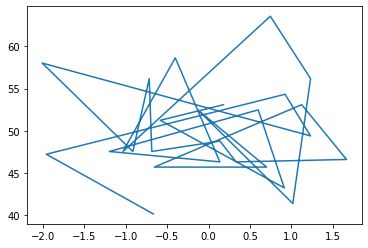

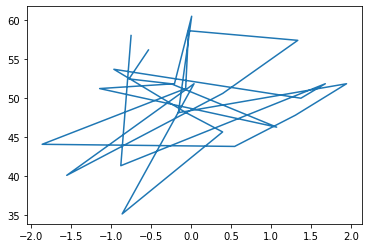

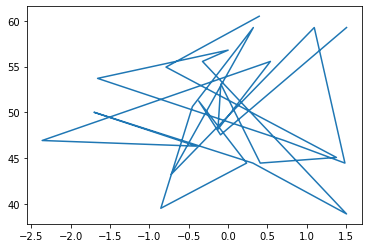

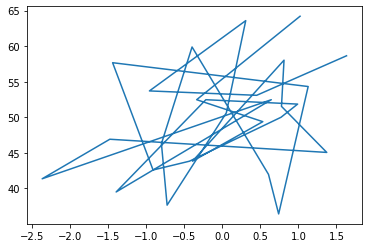

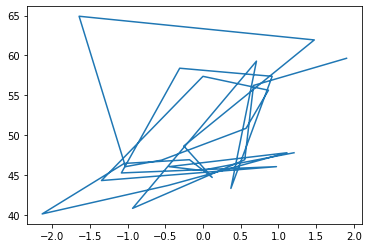

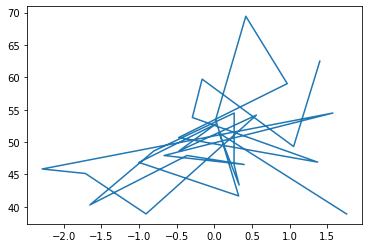

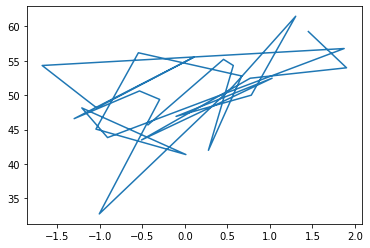

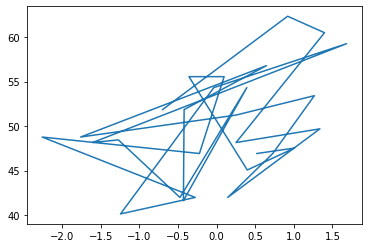

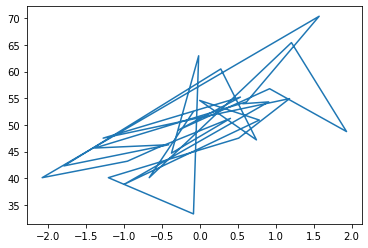

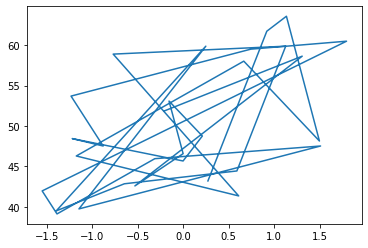

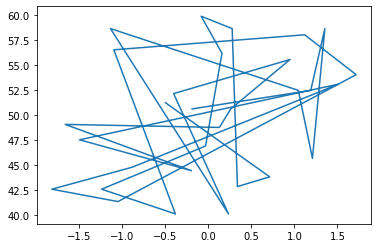

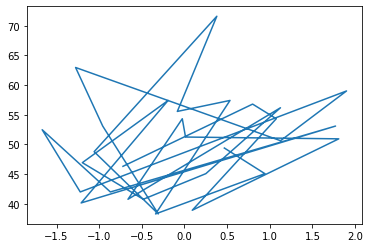

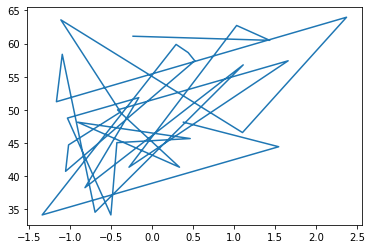

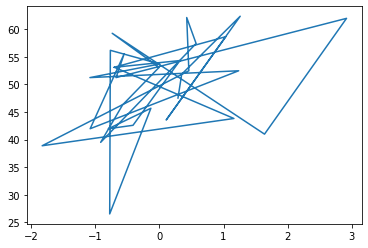

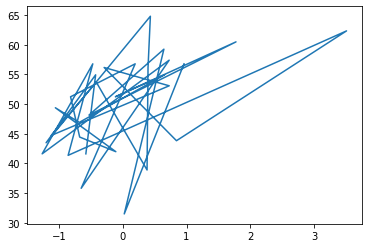

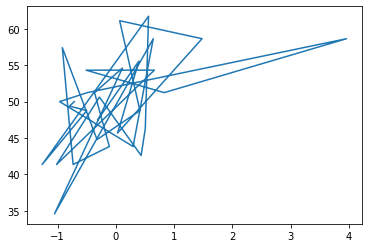

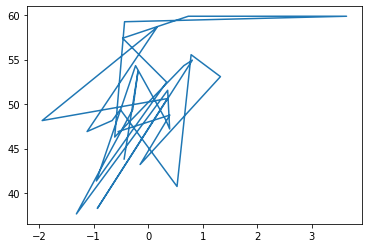

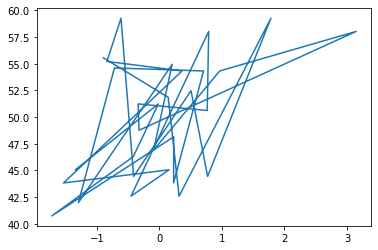

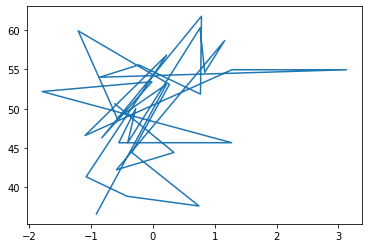

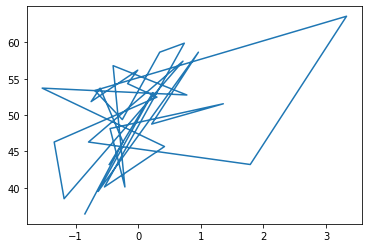

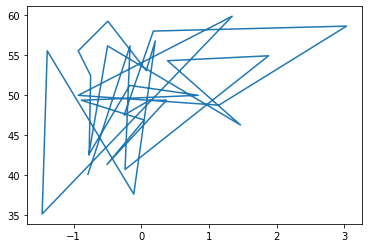

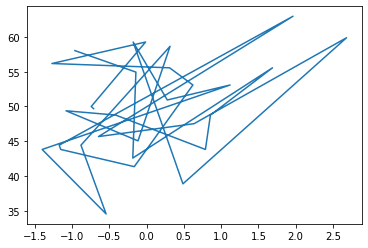

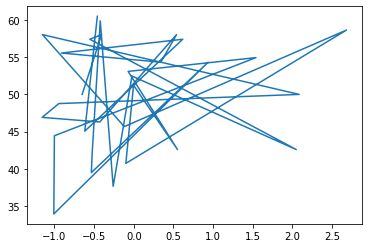

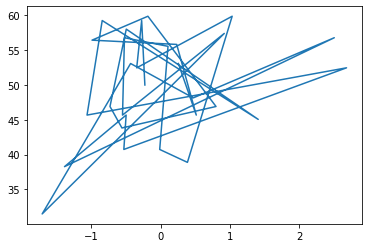

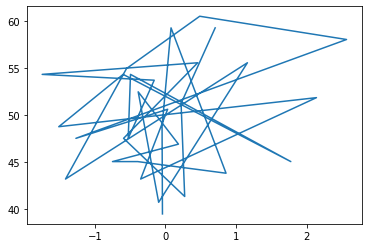

In [ ]:
for i in range(1985,2015):
    temp = data[data.yearID == i]
    plt.plot(temp['std_payroll'],temp['WinningPercentage'])
    plt.show()

As we can see, there is no clear pattern or correlation found from the lines

### Expected Wins

We scatter Std payroll with winning percentage

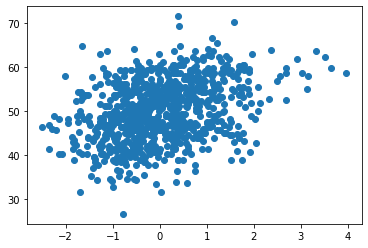

In [ ]:
plt.scatter(data['std_payroll'],data['WinningPercentage'])
plt.show()

Then we construct the regression line and plot it with the scattered data 

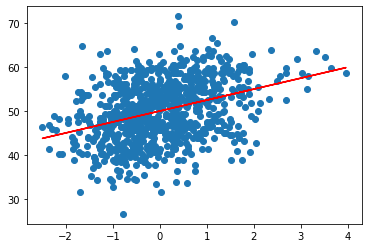

In [ ]:
regline = 50 + (2.5*np.array(data['std_payroll']))
plt.scatter(data['std_payroll'],data['WinningPercentage'])
plt.plot(data['std_payroll'],regline, color = "red")
plt.show()

From the previous plot and the regression line, we can identify a linear relation between the data.
This realtion can help to predict the expected number of wins for a team.

### Spending Effieciency 

First, we calculate the effieciency and add it as a new column in the dataframe.
Then, we plot the efficiency of each team over the course of the years.

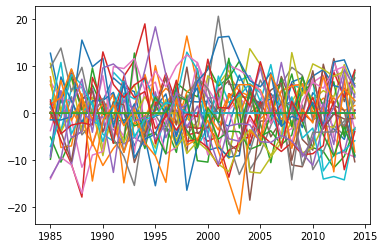

In [ ]:
Efficiency = np.array(data['WinningPercentage']) - regline 

data['Efficiency'] = Efficiency

for i in teamIDs:
    temp = data[data.teamID == i]
    
    #plt.plot(range(1985,2015),temp['Efficiency'])
    p = []
    
    
    for j in range(1985,2015):
        try:
            t = temp[temp.yearID == j]
            p.append(t['Efficiency'].values[0])
        except: 
            p.append(0.0)
    plt.plot(range(1985,2015), p)

plt.show()

To get a clear answer about the spending effieciency of Ockland A's we plot the efficiency of this team alone, for illustration.

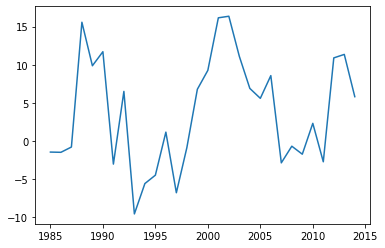

In [ ]:

temp = data[data.teamID == 'OAK']
    
    #plt.plot(range(1985,2015),temp['Efficiency'])
p = []
    
    
for j in range(1985,2015):
    try:
        t = temp[temp.yearID == j]
        p.append(t['Efficiency'].values[0])
    except: 
        p.append(0.0)
        
plt.plot(range(1985,2015), p)
plt.show()

It is very clear from the plot that the efficiency of the team was very much varying over the course of the years, it has increased a lot between the period 1985 - 1990, dropped again in the period between 1990 - 1995, then increased and reached its peak and stayed there for a while, in the period between 1995 - 2005 (The period about which the movie describes), dropped again between 2005 - 2010, and increased again but not much in 2010 - 2015.

There spending efficiency was varying, was great at some periods and was also bad in other periods.

But in the period of the movie, it increased a lot, from the bottom to the top, which indicates a great success!